In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_fc_sc_btw_two_species(species_1,species_2,):
    import pandas as pd
    import numpy as np
    #Convert Taxa to common names if NCBI taxa ID
    #Set up variable 
    fc_mapper = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')

    if type(species_1) == int:
        species_1 = fc_mapper['Common Name'].loc[fc_mapper['Taxa ID'] == species_1].item()
    if type(species_2) == int:
        species_2 = fc_mapper['Common Name'].loc[fc_mapper['Taxa ID'] == species_2].item()

    #Convert scientific name to common names if given scientific
    if ' ' in species_1:
        species_1 = fc_mapper['Common Name'].loc[fc_mapper['Species'] == species_1].item()
    if ' ' in species_2:
        species_2 = fc_mapper['Common Name'].loc[fc_mapper['Species'] == species_2].item()

    #Get Scientific Name
    scientific_1 = fc_mapper['Species'].loc[fc_mapper['Common Name'] == species_1].item()
    scientific_2 = fc_mapper['Species'].loc[fc_mapper['Common Name'] == species_2].item()

    if species_1 == species_2:
        raise NameError("Species are the Same, submit different species")
    
    # Get Path for Orthologs
    path_to_orthologs_mapped_pd = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/mapping_paths_for_fc_scores.csv',index_col = 0)
    path_to_orthologs = path_to_orthologs_mapped_pd.loc[scientific_1,scientific_2]

    ortholog_map = pd.read_csv(path_to_orthologs)
    file_name = path_to_orthologs.split('/')[-1]
    file_name = file_name.split('_')
    if file_name[0] == species_1:
        fc_sc_map = ortholog_map
        fc_sc_map.dropna(inplace = True)
    if file_name[1] == species_1:
        fc_sc_map = ortholog_map
        fc_sc_map.dropna(inplace = True)
    # return fc_sc_map,species_name
    return fc_sc_map

In [3]:
def get_fc_sc_btw_something_and_arabidopsis(species_1):
    import pandas as pd
    import numpy as np
    #Convert Taxa to common names if NCBI taxa ID
    #Set up variable 
    fc_mapper = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')

    species_2 = 'arabidopsis'
    
    if type(species_1) == int:
        species_1 = fc_mapper['Common Name'].loc[fc_mapper['Taxa ID'] == species_1].item()
    if type(species_2) == int:
        species_2 = fc_mapper['Common Name'].loc[fc_mapper['Taxa ID'] == species_2].item()

    #Convert scientific name to common names if given scientific
    if ' ' in species_1:
        species_1 = fc_mapper['Common Name'].loc[fc_mapper['Species'] == species_1].item()
    if ' ' in species_2:
        species_2 = fc_mapper['Common Name'].loc[fc_mapper['Species'] == species_2].item()

    #Get Scientific Name
    scientific_1 = fc_mapper['Species'].loc[fc_mapper['Common Name'] == species_1].item()
    scientific_2 = fc_mapper['Species'].loc[fc_mapper['Common Name'] == species_2].item()

    if species_1 == species_2:
        raise NameError("Species are the Same, submit different species")
    
    # Get Path for Orthologs
    path_to_orthologs_mapped_pd = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/mapping_paths_for_fc_scores_just_arab_1_1.csv',index_col = 0)
    path_to_orthologs = path_to_orthologs_mapped_pd.loc[scientific_1,scientific_2]

    ortholog_map = pd.read_csv(path_to_orthologs)
    file_name = path_to_orthologs.split('/')[-1]
    file_name = file_name.split('_')
    if file_name[0] == species_1:
        fc_sc_map = ortholog_map
        fc_sc_map.dropna(inplace = True)
    if file_name[1] == species_1:
        fc_sc_map = ortholog_map
        fc_sc_map.dropna(inplace = True)
    # return fc_sc_map,species_name
    return fc_sc_map

In [6]:
tier_1_species = ['mustard']
tier_2_species = ['medicago','soybean','apple','grape']
tier_2_and_ahalf_species = ['tobacco','potato','tomato']
tier_3_species = ['sorghum','brome','rice','maize']

In [7]:
one2one_tier1 = ['mustard']
one2one_tier2 = ['medicago','apple','grape']
one2one_tier2andahalf = ['tomato','tobacco','potato']
one2one_tier3 = ['sorghum','brome']

In [8]:
one2one_combo_tier2 = []
one2one_combo_tier2.extend(one2one_tier2)
one2one_combo_tier2.extend(one2one_tier2andahalf)
one2one_combo_tier2

['medicago', 'apple', 'grape', 'tomato', 'tobacco', 'potato']

In [9]:
combo_tier_2 = []
combo_tier_2.extend(tier_2_species)
combo_tier_2.extend(tier_2_and_ahalf_species)
combo_tier_2


['medicago', 'soybean', 'apple', 'grape', 'tobacco', 'potato', 'tomato']

In [10]:
three_tiered_comparison_lists =[tier_1_species,combo_tier_2,tier_3_species]
four_tiered_comparison_lists = [tier_1_species,tier_2_species,tier_2_and_ahalf_species,tier_3_species]


In [11]:
one2one_three_tiers = [one2one_tier1,one2one_combo_tier2,one2one_tier3]
one2one_four_tiers = [one2one_tier1,one2one_tier2,one2one_tier2andahalf,one2one_tier3]


In [12]:
one2one_three_tiers

[['mustard'],
 ['medicago', 'apple', 'grape', 'tomato', 'tobacco', 'potato'],
 ['sorghum', 'brome']]

In [13]:
## N to M Graphs
n_to_m_three_tier_pd = pd.DataFrame(columns = ['sp1_gene','sp2_gene','fc','sc','Time of Divergence'])
for sublist,gene_age in zip(three_tiered_comparison_lists,['0-40 MYA','40-120 MYA','>120MYA']):
    for species in sublist:
        current_full_gene_panda = get_fc_sc_btw_two_species('arabidopsis',species)
        current_full_gene_panda['Time of Divergence'] = gene_age
        n_to_m_three_tier_pd = pd.concat([n_to_m_three_tier_pd,current_full_gene_panda])


n_to_m_four_tier_pd = pd.DataFrame(columns = ['sp1_gene','sp2_gene','fc','sc','Time of Divergence'])
for sublist,gene_age in zip(four_tiered_comparison_lists,['0-40 MYA','40-110 MYA','110-150 MYA','>150 MYA']):
    for species in sublist:
        current_full_gene_panda = get_fc_sc_btw_two_species('arabidopsis',species)
        current_full_gene_panda['Time of Divergence'] = gene_age
        n_to_m_four_tier_pd = pd.concat([n_to_m_four_tier_pd,current_full_gene_panda])
        
        

In [14]:
n_to_m_three_tier_pd

,sp1_gene,sp2_gene,fc,sc,Time of Divergence
0,LOC103852375,AT1G67120,0.965179,0.99925,0-40 MYA
1,LOC103858085,AT2G43680,0.668932,0.633379,0-40 MYA
2,LOC103866735,AT2G43680,0.912437,0.947414,0-40 MYA
3,LOC103841819,AT2G43680,0.684796,0.777245,0-40 MYA
4,LOC103858085,AT3G59690,0.71017,0.859114,0-40 MYA
...,...,...,...,...,...
28607,AT4G28450,Zm00001d034883,0.929695,0.984241,>120MYA
28608,AT1G70460,Zm00001d011450,0.153238,0.013185,>120MYA
28609,AT1G23540,Zm00001d011450,0.370911,0.353658,>120MYA
28610,AT1G32530,Zm00001d020292,0.84664,0.954276,>120MYA


<AxesSubplot:xlabel='Time of Divergence', ylabel='fc'>

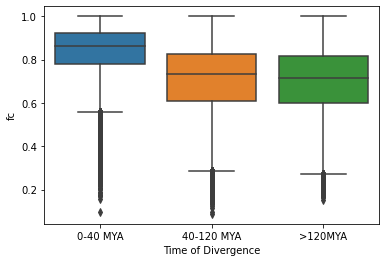

In [15]:
sns.boxplot(data = n_to_m_three_tier_pd, x = 'Time of Divergence',y = 'fc')

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

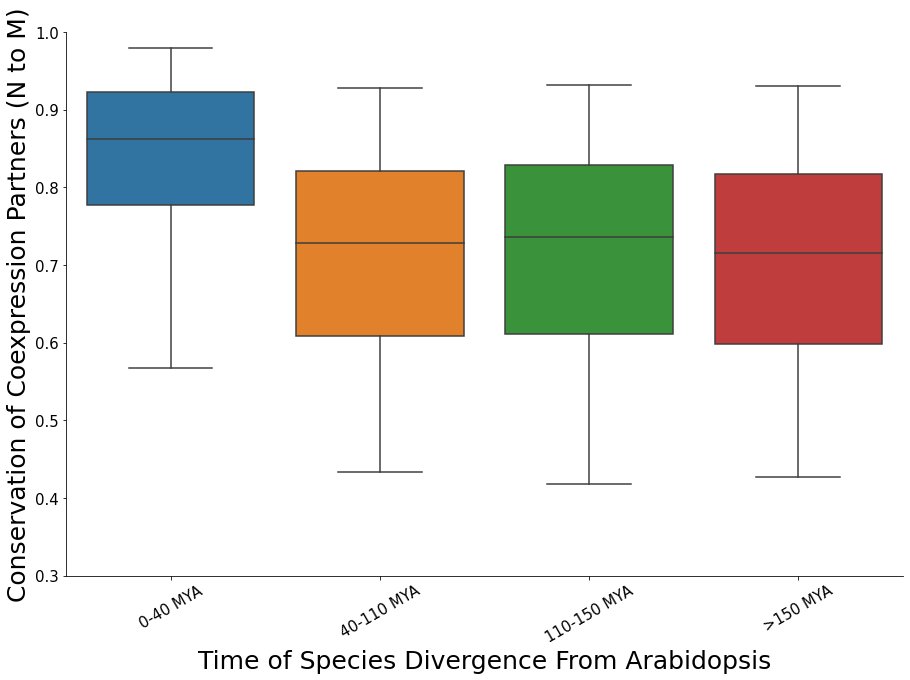

In [16]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = n_to_m_four_tier_pd, x = 'Time of Divergence',y = 'fc',fliersize = 0, whis =[5,95])
fig.patch.set_facecolor('white')

sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
plt.ylim(.3,1)
plt.xlabel("Time of Species Divergence From Arabidopsis", fontsize = 25)
plt.ylabel("Conservation of Coexpression Partners (N to M)", fontsize = 25)


#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)

In [35]:
##One to one Graphs
one2one_three_level_pd = pd.DataFrame(columns = ['sp1_gene','sp2_gene','fc','sc','Time of Divergence'])
for sublist,gene_age in zip(one2one_three_tiers,['0-40 MYA','40-120 MYA','>120MYA']):
    for species in sublist:
        current_full_gene_panda = get_fc_sc_btw_something_and_arabidopsis(species)
        current_full_gene_panda['Time of Divergence'] = gene_age
        one2one_three_level_pd = pd.concat([one2one_three_level_pd,current_full_gene_panda])


one2one_four_level_pd = pd.DataFrame(columns = ['sp1_gene','sp2_gene','fc','sc','Time of Divergence'])
for sublist,gene_age in zip(one2one_four_tiers,['0-40 MYA','40-110 MYA','110-150 MYA','>150 MYA']):
    for species in sublist:
        current_full_gene_panda = get_fc_sc_btw_something_and_arabidopsis(species)
        current_full_gene_panda['Time of Divergence'] = gene_age
        one2one_four_level_pd = pd.concat([one2one_four_level_pd,current_full_gene_panda])

In [36]:
one2one_three_level_pd

,sp1_gene,sp2_gene,fc,sc,Time of Divergence
0,LOC103851936,AT4G31350,0.866682,0.967521,0-40 MYA
1,LOC103848812,AT4G33240,0.962295,0.995899,0-40 MYA
2,LOC103832164,AT3G23710,0.939274,0.964026,0-40 MYA
3,LOC103859696,AT4G22000,0.981544,0.988444,0-40 MYA
4,LOC103857048,AT4G19010,0.80829,0.719571,0-40 MYA
...,...,...,...,...,...
171,LOC100845444,AT4G00590,0.805723,0.895714,>120MYA
172,LOC100841911,AT1G12790,0.814759,0.891429,>120MYA
173,LOC100821885,AT5G38360,0.868976,0.931429,>120MYA
174,LOC100824959,AT1G70620,0.859036,0.974286,>120MYA


<AxesSubplot:xlabel='Time of Divergence', ylabel='fc'>

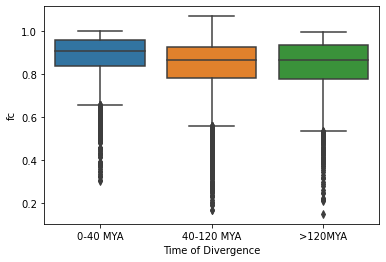

In [37]:
sns.boxplot(data = one2one_three_level_pd, x = 'Time of Divergence',y = 'fc')

<AxesSubplot:xlabel='Time of Divergence', ylabel='fc'>

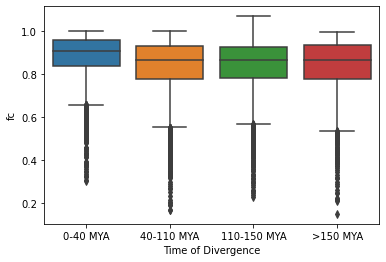

In [38]:
sns.boxplot(data = one2one_four_level_pd, x = 'Time of Divergence',y = 'fc')

In [39]:
arabdidopsis_to_chlam_one_to_one = pd.read_csv('/data/suresh/species/CoCoCoNet2/scores1-1/chlam_arabidopsis_prio_11.csv')
arabdidopsis_to_chlam_one_to_one.dropna(inplace = True)
arabdidopsis_to_chlam_one_to_one['Time of Divergence'] = '~1 Billion Years Ago'
one2one_with_chlam = pd.concat([one2one_three_level_pd,arabdidopsis_to_chlam_one_to_one])
one2one_with_chlam

,sp1_gene,sp2_gene,fc,sc,Time of Divergence
0,LOC103851936,AT4G31350,0.866682,0.967521,0-40 MYA
1,LOC103848812,AT4G33240,0.962295,0.995899,0-40 MYA
2,LOC103832164,AT3G23710,0.939274,0.964026,0-40 MYA
3,LOC103859696,AT4G22000,0.981544,0.988444,0-40 MYA
4,LOC103857048,AT4G19010,0.80829,0.719571,0-40 MYA
...,...,...,...,...,...
1596,CHLREDRAFT_189960,AT3G27640,0.891012,0.986563,~1 Billion Years Ago
1597,CHLREDRAFT_171607,AT3G17465,0.572596,0.627656,~1 Billion Years Ago
1598,CHLREDRAFT_56268,AT2G28560,0.666248,0.746875,~1 Billion Years Ago
1599,CHLREDRAFT_146323,AT3G53760,0.739409,0.932813,~1 Billion Years Ago


In [40]:
arabdidopsis_to_chlam_nm = pd.read_csv('/data/suresh/species/CoCoCoNet2/scoresN-M/chlam_arabidopsis_prio_NM.csv')
arabdidopsis_to_chlam_nm.dropna(inplace = True)
arabdidopsis_to_chlam_nm['Time of Divergence'] = '~1 Billion Years Ago'
n_to_m_withchlam = pd.concat([n_to_m_three_tier_pd,arabdidopsis_to_chlam_nm])
n_to_m_withchlam

,sp1_gene,sp2_gene,fc,sc,Time of Divergence
0,LOC103852375,AT1G67120,0.965179,0.99925,0-40 MYA
1,LOC103858085,AT2G43680,0.668932,0.633379,0-40 MYA
2,LOC103866735,AT2G43680,0.912437,0.947414,0-40 MYA
3,LOC103841819,AT2G43680,0.684796,0.777245,0-40 MYA
4,LOC103858085,AT3G59690,0.71017,0.859114,0-40 MYA
...,...,...,...,...,...
9972,CHLREDRAFT_206042,AT2G44180,0.356238,0.164581,~1 Billion Years Ago
9973,CHLREDRAFT_206042,AT3G59990,0.616762,0.682143,~1 Billion Years Ago
9974,CHLREDRAFT_149752,AT1G52920,0.641516,0.755804,~1 Billion Years Ago
9975,CHLREDRAFT_149752,AT2G20770,0.673366,0.691568,~1 Billion Years Ago


In [41]:
arabi_to_human_nm = pd.read_csv('/data/suresh/species/CoCoCoNet2/scoresN-M/arabidopsis_human_prio_NM.csv')
arabi_to_human_nm.dropna(inplace = True)
arabi_to_human_nm['Time of Divergence'] = '~1.5 Billion Years Ago'
n_to_m_chlam_and_human = pd.concat([n_to_m_withchlam,arabi_to_human_nm])
n_to_m_chlam_and_human

,sp1_gene,sp2_gene,fc,sc,Time of Divergence
0,LOC103852375,AT1G67120,0.965179,0.99925,0-40 MYA
1,LOC103858085,AT2G43680,0.668932,0.633379,0-40 MYA
2,LOC103866735,AT2G43680,0.912437,0.947414,0-40 MYA
3,LOC103841819,AT2G43680,0.684796,0.777245,0-40 MYA
4,LOC103858085,AT3G59690,0.71017,0.859114,0-40 MYA
...,...,...,...,...,...
54155,AT4G29690,ENSG00000136960,0.52217,0.948964,~1.5 Billion Years Ago
54156,AT4G29700,ENSG00000136960,0.509091,0.941522,~1.5 Billion Years Ago
54157,AT4G29680,ENSG00000136960,0.676371,0.884391,~1.5 Billion Years Ago
54158,AT3G25520,ENSG00000122406,0.826362,0.965221,~1.5 Billion Years Ago


In [42]:
n_to_m_chlam_and_human = n_to_m_chlam_and_human.replace(to_replace= {'>120MYA':'>120 MYA'})

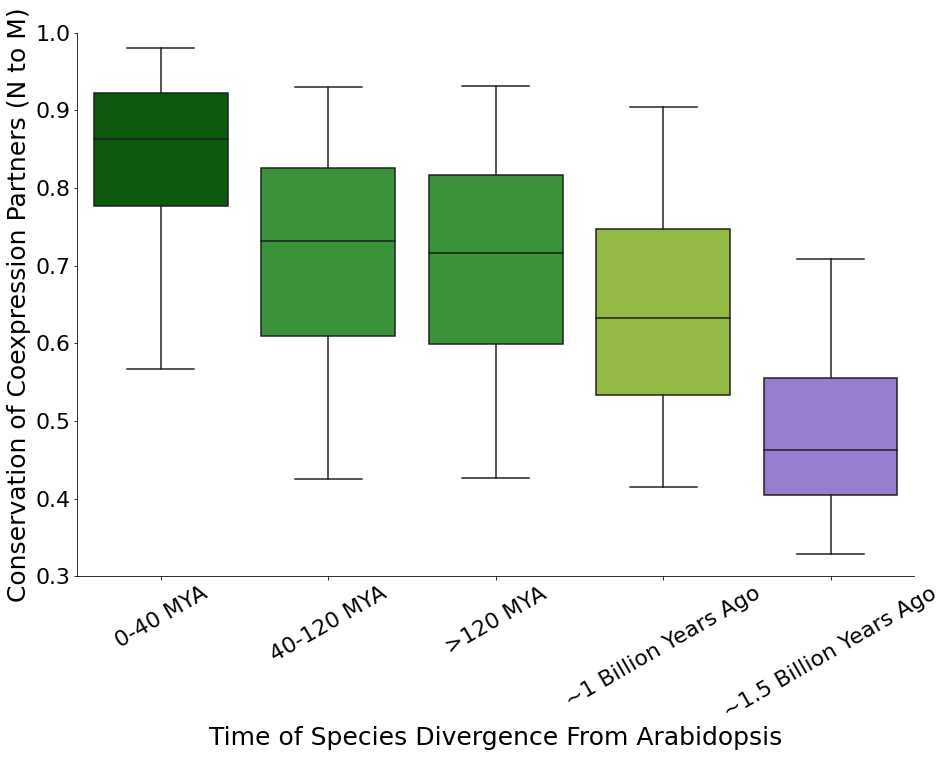

In [46]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.boxplot(data = n_to_m_chlam_and_human, x = 'Time of Divergence',y = 'fc', fliersize = 0, whis =[5,95], order = ['0-40 MYA','40-120 MYA','>120 MYA','~1 Billion Years Ago','~1.5 Billion Years Ago'],palette = ['darkgreen','tab:green','tab:green','yellowgreen','mediumpurple'])

fig.patch.set_facecolor('white')

sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
plt.ylim(.3,1)
plt.xlabel("Time of Species Divergence From Arabidopsis", fontsize = 25)
plt.ylabel("Conservation of Coexpression Partners (N to M)", fontsize = 25)


#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 22, rotation = 30)
plt.yticks(fontsize = 22)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_fixed_figure.jpg',dpi = 800,bbox_inches='tight')


In [94]:
n_to_m_chlam_and_human.groupby('Time of Divergence').mean().reset_index()

,Time of Divergence,fc,sc
0,0-40 MYA,0.831886,0.901780
1,40-120 MYA,0.709855,0.803862
2,>120MYA,0.701570,0.795541
3,~1 Billion Years Ago,0.642394,0.734422
4,~1.5 Billion Years Ago,0.486568,0.648981


(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

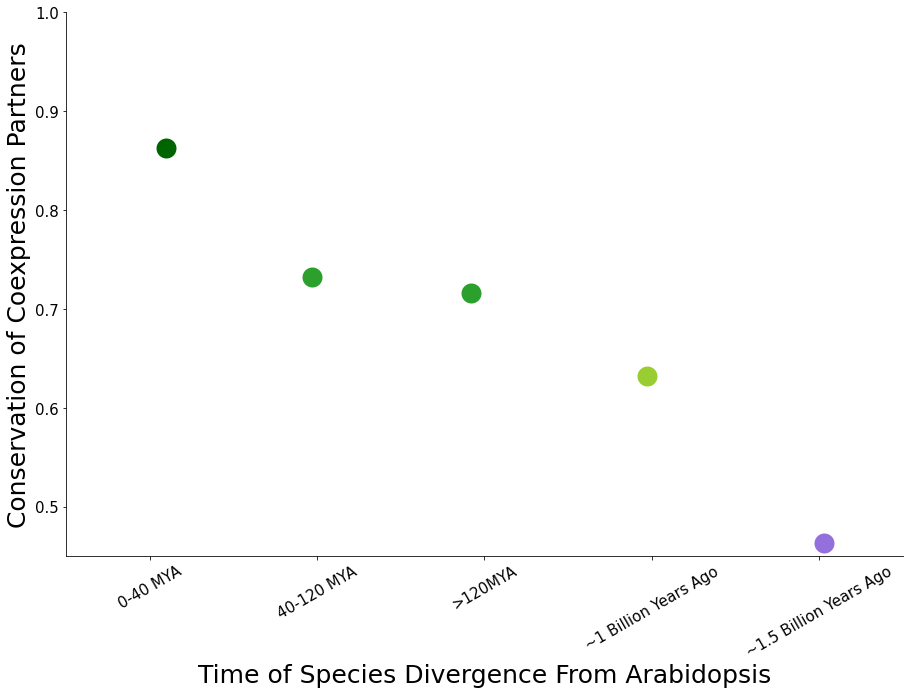

In [116]:
fig, ax = plt.subplots(figsize = (15,10))

sns.stripplot(data = n_to_m_chlam_and_human.groupby('Time of Divergence').median().reset_index(), x = 'Time of Divergence',y = 'fc' , size = 20, palette = ['darkgreen','tab:green','tab:green','yellowgreen','mediumpurple'])
fig.patch.set_facecolor('white')

sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
plt.ylim(.45,1)
plt.xlabel("Time of Species Divergence From Arabidopsis", fontsize = 25)
plt.ylabel("Conservation of Coexpression Partners", fontsize = 25)


#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15, rotation = 30)
plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)
